<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [ ]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras] --ignore-installed

  Using cached sktime-0.11.2-py3-none-any.whl (6.6 MB)
  Using cached numba-0.55.1-1-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Using cached pyod-1.0.0-py3-none-any.whl
  Using cached tensorflow-2.8.0-cp37-cp37m-manylinux2010_x86_64.whl (497.5 MB)
  Using cached statsforecast-0.5.3-py3-none-any.whl (31 kB)
  Using cached stumpy-1.11.1-py3-none-any.whl (136 kB)
  Using cached prophet-1.0.1-py3-none-any.whl
  Using cach

In [182]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



In [184]:
# скачаем данные

!git clone https://github.com/rishabh89007/Time_Series_Datasets.git

fatal: destination path 'Time_Series_Datasets' already exists and is not an empty directory.


In [361]:
# считаем файлы
ts1 = pd.read_csv('/content/Time_Series_Datasets/Brent Spot Price.csv')
ts2 = pd.read_csv('/content/Time_Series_Datasets/Nuclear Capacity.csv')

Первый датасет (Brent crude oil spot price, Monthly (dollars per barrel)) с месячной частотой, второй (U.S. nuclear capacity, daily (Megawatts)) - с дневной частотой


**Предобработка первого датасета**

In [186]:
ts1.head()

,Unnamed: 0,"Brent crude oil spot price, Monthly (dollars per barrel)"
0,1990 01,21.251
1,1990 02,19.813
2,1990 03,18.387
3,1990 04,16.612
4,1990 05,16.352


In [187]:
ts1.rename(columns = {'Unnamed: 0' : 'Time', 'Brent crude oil spot price, Monthly (dollars per barrel)' : 'Price'}, inplace = True)
ts1['Time'] = ts1['Time'].apply(lambda x: pd.to_datetime(x[:-1], format='%Y %m'))

In [188]:
ts1.head()

,Time,Price
0,1990-01-01,21.251
1,1990-02-01,19.813
2,1990-03-01,18.387
3,1990-04-01,16.612
4,1990-05-01,16.352


In [189]:
ts1.dtypes

Time     datetime64[ns]
Price           float64
dtype: object

**Предобработка второго датасета**

In [190]:
ts2.head()

,Unnamed: 0,"U.S. nuclear capacity, daily (Megawatts)"
0,2007 0101 01,101764.9
1,2007 0102 02,101764.9
2,2007 0103 03,101764.9
3,2007 0104 04,101764.9
4,2007 0105 05,101764.9


In [362]:
ts2.rename(columns = {'Unnamed: 0' : 'Time', 'U.S. nuclear capacity, daily (Megawatts)' : 'Capacity'}, inplace = True)
ts2['Time'] = ts2['Time'].apply(lambda x: pd.to_datetime(x.split()[0] + x.split()[1][:2] + x.split()[2], format='%Y%m%d'))

In [192]:
ts2.head()

,Time,Capacity
0,2007-01-01,101764.9
1,2007-01-02,101764.9
2,2007-01-03,101764.9
3,2007-01-04,101764.9
4,2007-01-05,101764.9


In [193]:
ts2.dtypes

Time        datetime64[ns]
Capacity           float64
dtype: object

Обработка данных закончена

In [194]:
# сделаем разбиение на train/test

test_size_1 = int(ts1["Time"].count() * 0.2)
test_size_2 = int(ts2["Time"].count() * 0.2)

train_df_1 = ts1[:-test_size_1]
test_df_1  = ts1[-test_size_1:]

train_df_2 = ts2[:-test_size_2]
test_df_2  = ts2[-test_size_2:]

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

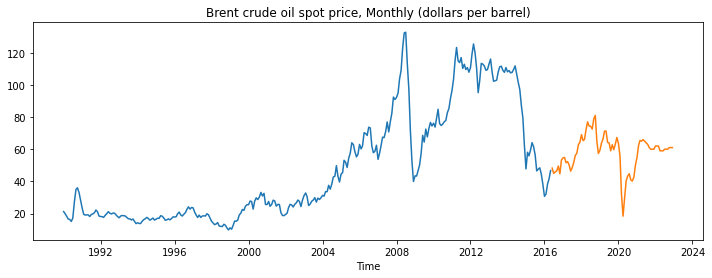

In [195]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(train_df_1["Time"], train_df_1["Price"], test_df_1["Time"], test_df_1["Price"])
plt.xlabel('Time')
plt.title('Brent crude oil spot price, Monthly (dollars per barrel)')
plt.show()

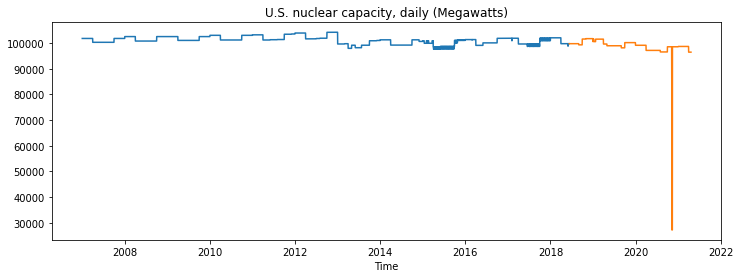

In [196]:
plt.figure(figsize=(12, 4))
plt.plot(train_df_2["Time"], train_df_2["Capacity"], test_df_2["Time"], test_df_2["Capacity"])
plt.xlabel('Time')
plt.title('U.S. nuclear capacity, daily (Megawatts)')
plt.show()

In [197]:
# посчитайте и нарисуйте график автокорреляционной функции
# hint, используйте для этого np.correlate(..., mode='full')
x1 = train_df_1["Price"] - train_df_1["Price"].mean()
x2 = train_df_2["Capacity"] - train_df_2["Capacity"].mean()

acf_1 = np.correlate(x1, x1, mode='full')
acf_2 = np.correlate(x2, x2, mode='full')

acf_1 = acf_1[acf_1.size//2:]
acf_2 = acf_2[acf_2.size//2:]

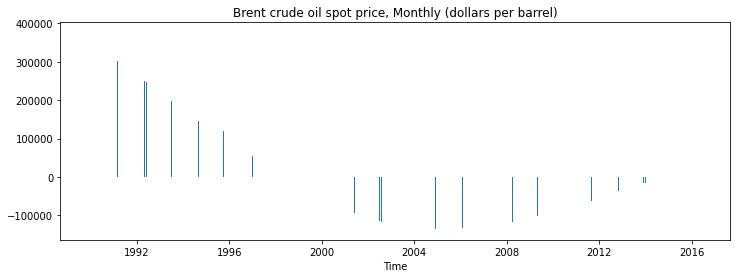

In [198]:
plt.figure(figsize=(12, 4))
plt.bar(train_df_1["Time"], acf_1)
plt.xlabel('Time')
plt.title('Brent crude oil spot price, Monthly (dollars per barrel)')
plt.show()

График АКФ получился так себе, построим его с помощью другого функционала

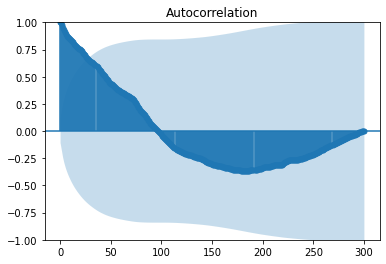

In [199]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train_df_1["Price"], lags=300)
plt.show()

АКФ не показывает никакой сезонности

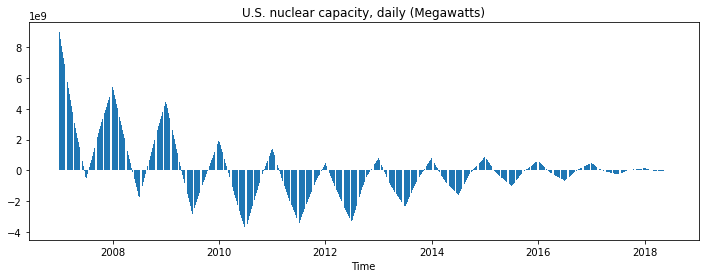

In [200]:
plt.figure(figsize=(12, 4))
plt.bar(train_df_2["Time"], acf_2)
plt.xlabel('Time')
plt.title('U.S. nuclear capacity, daily (Megawatts)')
plt.show()

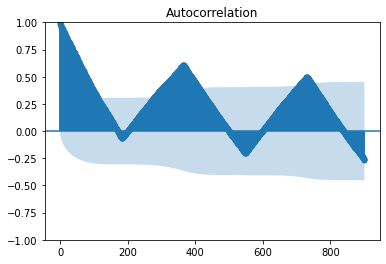

In [202]:
plot_acf(train_df_2["Capacity"], lags=900)
plt.show()

В данном случае, сезонность наблюдается. Основание треугольников примерно равно году => годичная сезонность.

In [213]:
train_df_2["Time"].size

4180

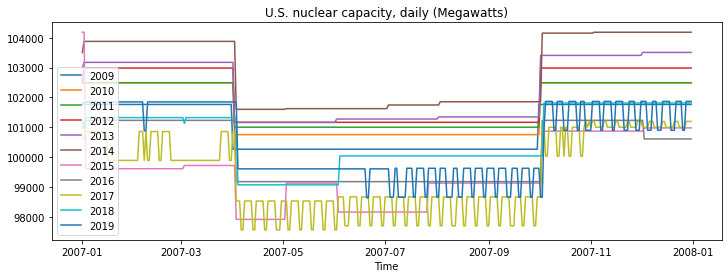

In [220]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными

period = train_df_2["Time"].size // 365

plt.figure(figsize=(12, 4))
for i in range(period):
  plt.plot(train_df_2["Time"][0:365], train_df_2["Capacity"][i*365:i*365+365], label=f"{2009+i}")
plt.xlabel('Time')
plt.title('U.S. nuclear capacity, daily (Megawatts)')
plt.legend()
plt.show()

Никаких повторяющихся компонентов не обнаружено => нет никакой сезонности ни в первом графике, ни во втором

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

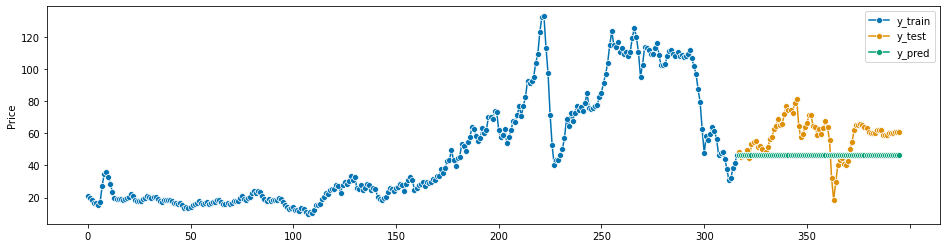

In [221]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series

# ваш код обучения моделей здесь
fh = ForecastingHorizon(test_df_1.index, is_relative=False)

NF_model = NaiveForecaster(strategy='last', sp=1)

NF_model.fit(train_df_1["Price"])

y_pred_NF = NF_model.predict(fh)

plot_series(train_df_1["Price"], test_df_1["Price"], y_pred_NF, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [268]:
# посчитайте метрики на test
from sktime.performance_metrics.forecasting import MeanAbsoluteError

mae = MeanAbsoluteError()
mae_results = pd.DataFrame(columns = ["Model", "MAE"])
mae_results.loc[0,"Model"] = "NaiveForecaster"
mae_results.loc[0,"MAE"] = mae(test_df_1["Price"], y_pred_NF)

mae_results.head()

,Model,MAE
0,NaiveForecaster,13.649646


### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

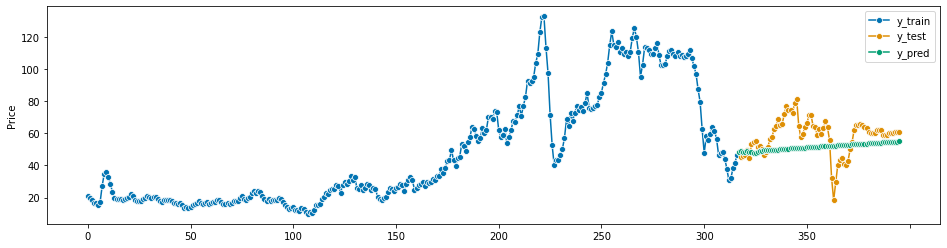

In [267]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

# ваш код обучения моделей здесь
ARIMA_model = ARIMA(
    order=(1, 1, 1),
    seasonal_order=(1, 0, 0, 12),
    suppress_warnings=True)

ARIMA_model.fit(train_df_1["Price"])

y_pred_ARIMA = ARIMA_model.predict(fh)

plot_series(train_df_1["Price"], test_df_1["Price"], y_pred_ARIMA, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [270]:
# посчитайте метрики на test
mae_results.loc[1,"Model"] = "ARIMA"
mae_results.loc[1,"MAE"] = mae(test_df_1["Price"], y_pred_ARIMA)

mae_results.head()

,Model,MAE
0,NaiveForecaster,13.649646
1,ARIMA,10.46998


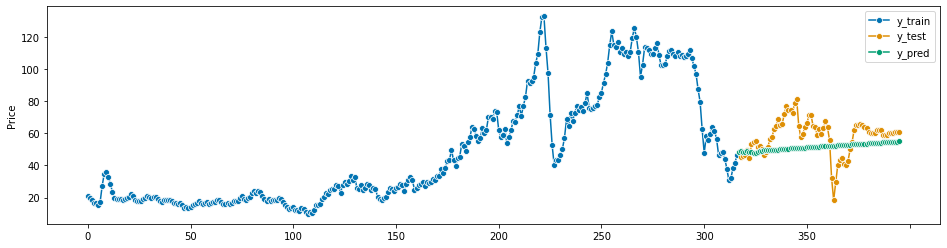

In [271]:
autoARIMA_model = AutoARIMA(sp=1, suppress_warnings=True)
autoARIMA_model.fit(train_df_1["Price"])
y_pred_autoARIMA = autoARIMA_model.predict(fh)

plot_series(train_df_1["Price"], test_df_1["Price"], y_pred_ARIMA, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [272]:
mae_results.loc[2,"Model"] = "autoARIMA"
mae_results.loc[2,"MAE"] = mae(test_df_1["Price"], y_pred_autoARIMA)

mae_results.head()

,Model,MAE
0,NaiveForecaster,13.649646
1,ARIMA,10.46998
2,autoARIMA,11.58454


### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


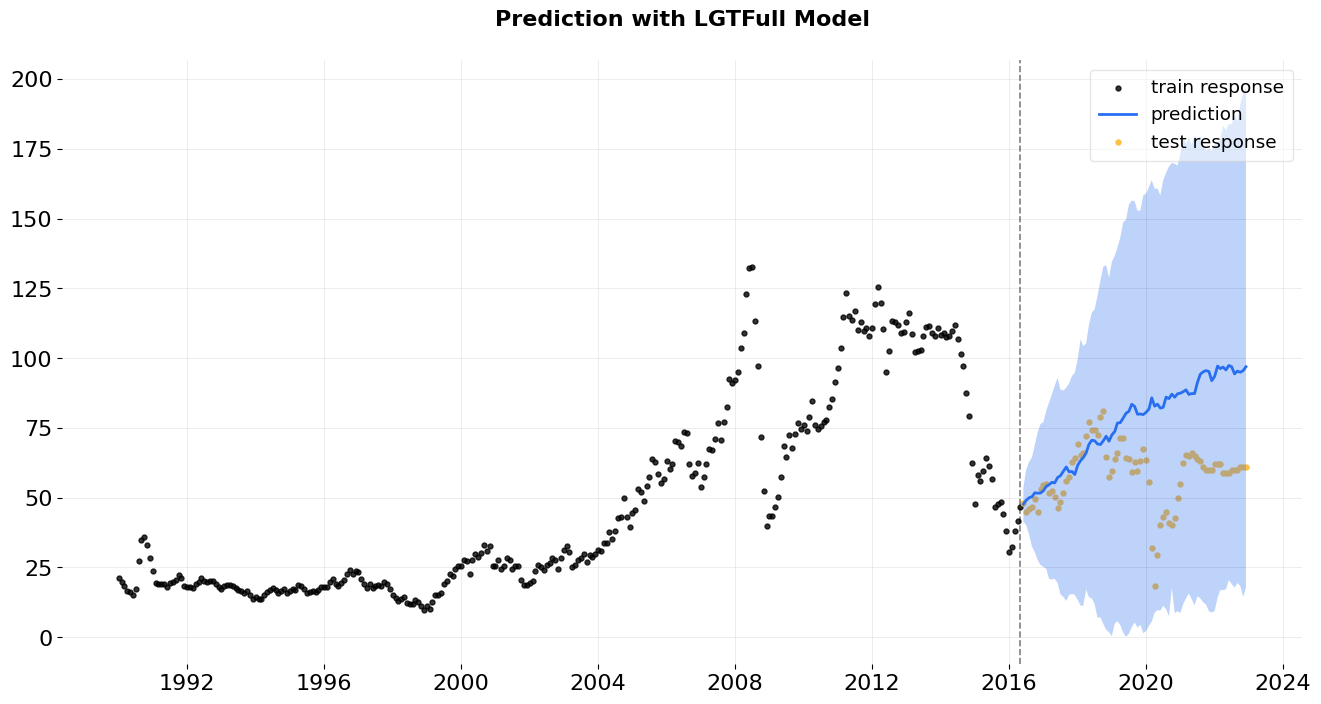

In [242]:
from orbit.models import LGT
from orbit.diagnostics.plot import plot_predicted_data

# ваш код обучения моделей здесь
lgt = LGT(
    response_col="Price",
    date_col="Time",
    seasonality=1,
    seed=666
)
lgt.fit(df=train_df_1)

y_pred_lgt = lgt.predict(df=test_df_1)

_ = plot_predicted_data(training_actual_df=train_df_1, predicted_df=y_pred_lgt, date_col=lgt.date_col, actual_col=lgt.response_col, test_actual_df=test_df_1, title='Prediction with LGTFull Model')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_05ff738ef22ce2e8a332ce639cee65cf NOW.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


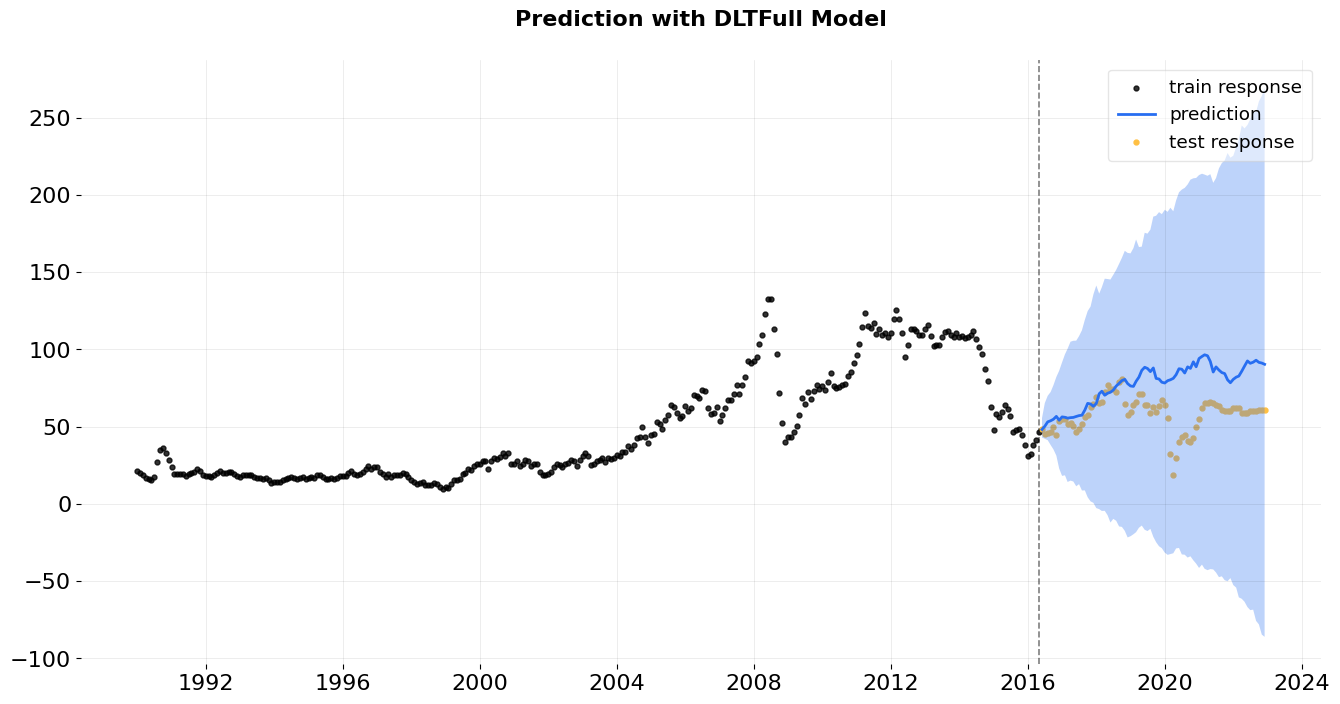

In [249]:
from orbit.models import DLT

dlt = DLT(
    response_col="Price",
    date_col="Time",
    seasonality=1,
    seed=666
)
dlt.fit(df=train_df_1)

y_pred_dlt = dlt.predict(df=test_df_1)

_ = plot_predicted_data(training_actual_df=train_df_1, predicted_df=y_pred_dlt, date_col=dlt.date_col, actual_col=dlt.response_col, test_actual_df=test_df_1, title='Prediction with DLTFull Model')

In [273]:
# посчитайте метрики на test

mae_results.loc[3,"Model"] = "LGT"
mae_results.loc[3,"MAE"] = mae(test_df_1["Price"], y_pred_lgt["prediction"])
mae_results.loc[4,"Model"] = "DLT"
mae_results.loc[4,"MAE"] = mae(test_df_1["Price"], y_pred_dlt["prediction"])

mae_results.head()

,Model,MAE
0,NaiveForecaster,13.649646
1,ARIMA,10.46998
2,autoARIMA,11.58454
3,LGT,20.354399
4,DLT,19.592904


### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

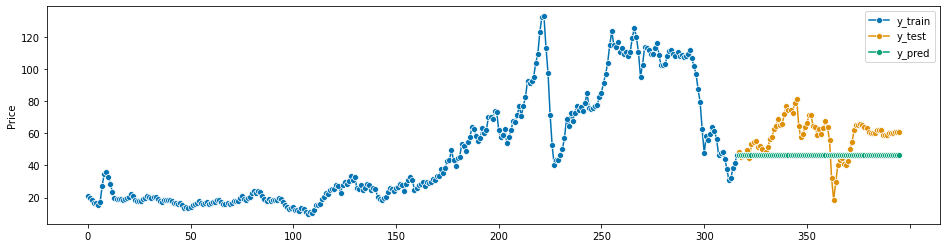

In [274]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

# ваш код обучения моделей здесь
ets_model = ExponentialSmoothing(sp=1)
ets_model.fit(train_df_1["Price"])
y_pred_ets = ets_model.predict(fh)

plot_series(train_df_1["Price"], test_df_1["Price"], y_pred_ets, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

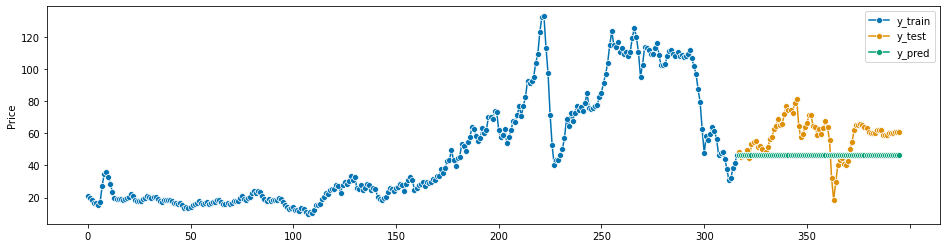

In [275]:
auto_ets_model = AutoETS(trend="add", auto=True, sp=1)
auto_ets_model.fit(train_df_1["Price"])
y_pred_auto_ets = auto_ets_model.predict(fh)

plot_series(train_df_1["Price"], test_df_1["Price"], y_pred_auto_ets, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [278]:
# посчитайте метрики на test

mae_results.loc[5,"Model"] = "ETS"
mae_results.loc[5,"MAE"] = mae(test_df_1["Price"], y_pred_ets)
mae_results.loc[6,"Model"] = "autoETS"
mae_results.loc[6,"MAE"] = mae(test_df_1["Price"], y_pred_auto_ets)

mae_results

,Model,MAE
0,NaiveForecaster,13.649646
1,ARIMA,10.46998
2,autoARIMA,11.58454
3,LGT,20.354399
4,DLT,19.592904
5,ETS,13.649646
6,autoETS,13.649979


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

In [280]:
# нарисуйте пресказания
# было сделано к каждой модели :)

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

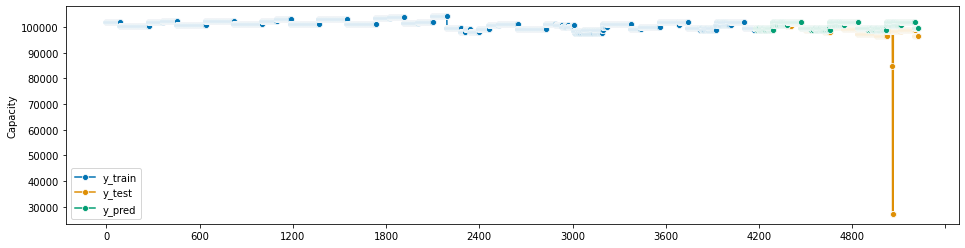

In [282]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
fh = ForecastingHorizon(test_df_2.index, is_relative=False)

NF_model = NaiveForecaster(strategy='last', sp=365)

NF_model.fit(train_df_2["Capacity"])

y_pred_NF = NF_model.predict(fh)

plot_series(train_df_2["Capacity"], test_df_2["Capacity"], y_pred_NF, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [285]:
# посчитайте метрики на test
mae_results_2 = pd.DataFrame(columns = ["Model", "MAE"])
mae_results_2.loc[0,"Model"] = "NaiveForecaster"
mae_results_2.loc[0,"MAE"] = mae(test_df_2["Capacity"], y_pred_NF)

mae_results_2.head()

,Model,MAE
0,NaiveForecaster,2043.123158


### KTR из orbit (1 балл).



INFO:root:Guessed max_plate_nesting = 1


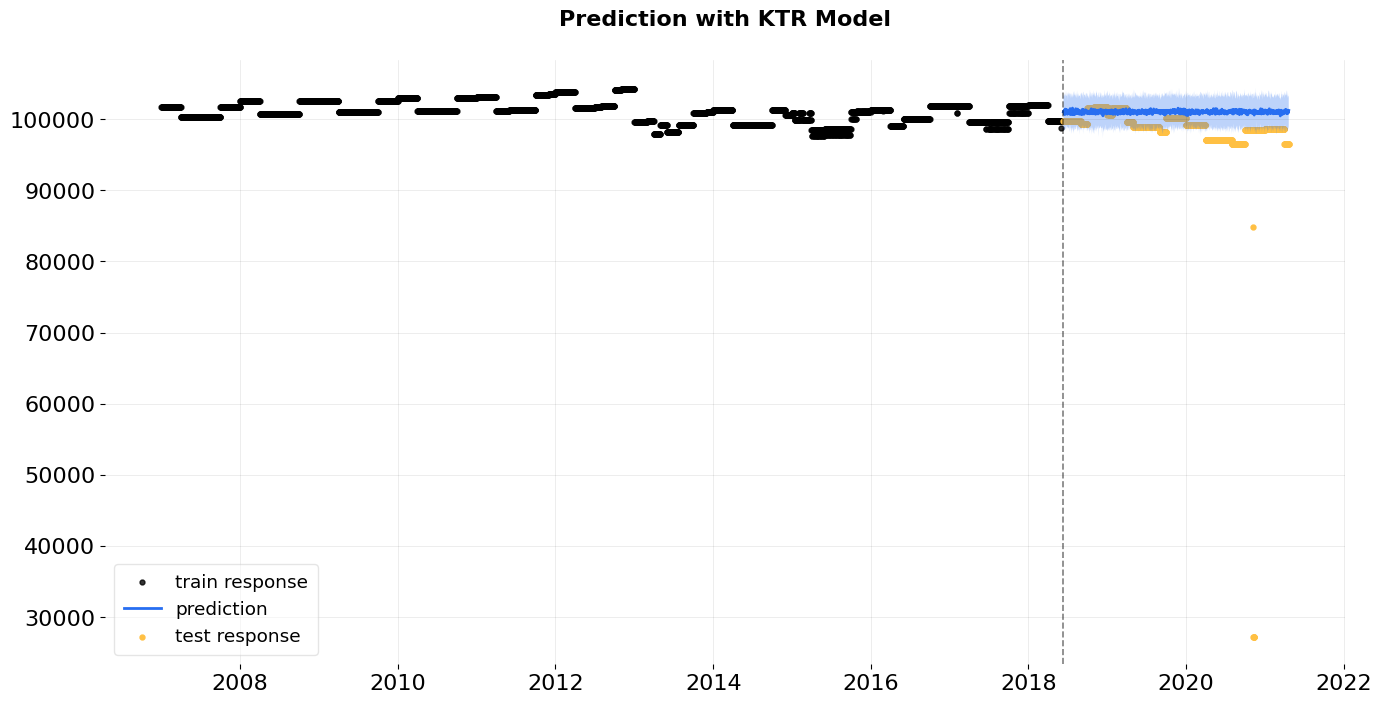

In [288]:
from orbit.models import KTR

# ваш код обучения моделей здесь
ktr = KTR(
    response_col='Capacity',
    date_col='Time',
    seasonality=365,
    seed=666
)
ktr.fit(df=train_df_2)

y_pred_ktr = ktr.predict(df=test_df_2)

_ = plot_predicted_data(training_actual_df=train_df_2, predicted_df=y_pred_ktr, date_col=ktr.date_col, actual_col=ktr.response_col, test_actual_df=test_df_2, title='Prediction with KTR Model')

In [289]:
# посчитайте метрики на test

mae_results_2.loc[1,"Model"] = "KTR"
mae_results_2.loc[1,"MAE"] = mae(test_df_2["Capacity"], y_pred_ktr["prediction"])

mae_results_2.head()

,Model,MAE
0,NaiveForecaster,2043.123158
1,KTR,2444.345246


### Phophet (1 балл).



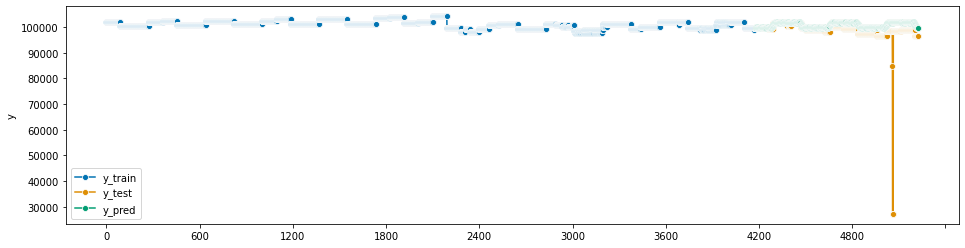

In [317]:
from prophet import Prophet

# ваш код обучения моделей здесь
prohet_model = Prophet(daily_seasonality=True)

train_prohet = pd.DataFrame(columns = ["ds", "y"])
test_prohet = pd.DataFrame(columns = ["ds", "y"])
train_prohet["ds"] = train_df_2["Time"]
train_prohet["y"] = train_df_2["Capacity"]
test_prohet["ds"] = test_df_2["Time"]
test_prohet["y"] = test_df_2["Capacity"]

prohet_model.fit(train_prohet)
future = prohet_model.make_future_dataframe(periods=ts2["Time"].size - train_prohet["ds"].size)
y_pred_prohet = prohet_model.predict(future)

plot_series(train_prohet["y"], test_prohet["y"], y_pred_prohet['yhat'][train_prohet["ds"].size:], labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [318]:
# посчитайте метрики на test

mae_results_2.loc[2,"Model"] = "Prohet"
mae_results_2.loc[2,"MAE"] = mae(test_df_2["Capacity"], y_pred_prohet['yhat'][train_prohet["ds"].size:])

mae_results_2.head()

,Model,MAE
0,NaiveForecaster,2043.123158
1,KTR,2444.345246
2,Prohet,2122.258319


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

In [ ]:
# нарисуйте пресказания
# и снова все сделано :)

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

In [375]:
# некоторая предобработка
# представлю даты вещественными числами, где логика в том, что всего 365 дней в году

for i in range(0, ts2['Time'].size, 365):
  for j in range(365):
    ts2['Time'][i+j] = j + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [376]:
# обучите классические модели ML

X = ts2.iloc[:, :-1].values
y = ts2.iloc[:, 1].values

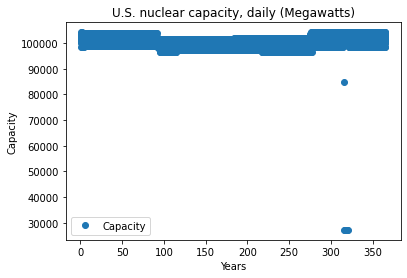

In [377]:
ts2.plot(x='Time', y='Capacity', style='o')
plt.title('U.S. nuclear capacity, daily (Megawatts)')
plt.xlabel('Years')
plt.ylabel('Capacity')
plt.show()

**Линейная регрессия**

In [378]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [379]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [380]:
y_pred = regressor.predict(X_test)

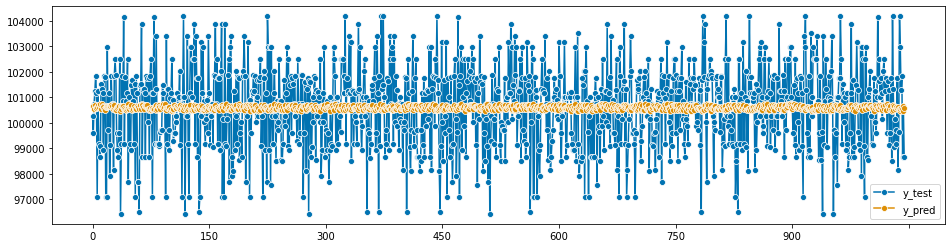

In [385]:
plot_series(pd.DataFrame(y_test), pd.DataFrame(y_pred), labels=['y_test', 'y_pred'])
plt.show()

In [387]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 1379.5059325090867


**Дерево решений**

In [388]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

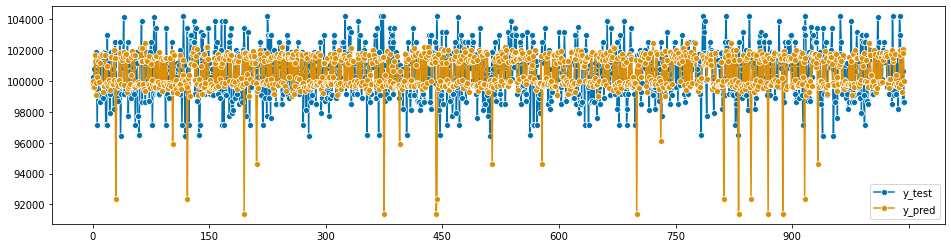

In [390]:
plot_series(pd.DataFrame(y_test), pd.DataFrame(y_pred), labels=['y_test', 'y_pred'])
plt.show()

In [389]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 1380.7966754059335


**Случайный лес**

In [391]:
# масштабирование

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [392]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

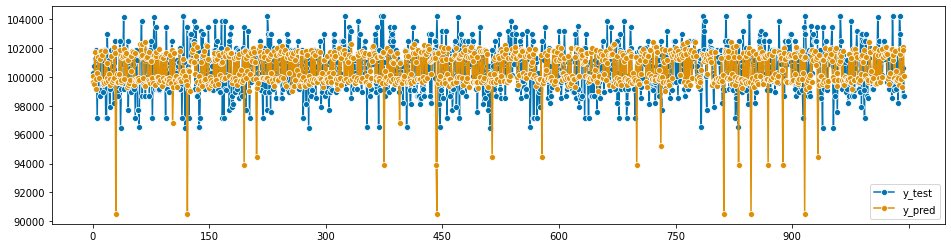

In [393]:
plot_series(pd.DataFrame(y_test), pd.DataFrame(y_pred), labels=['y_test', 'y_pred'])
plt.show()

In [394]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 1377.3696019968775


Случайный лес справился лучше всего, но разница между всеми представленными алгоритмами незначительная

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [ ]:
# ваш код модели на STAN и её обучения здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте предсказания